<a href="https://colab.research.google.com/github/atacanozkan/ClassMetotDemo/blob/master/globalAI_kaizen_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ortak

In [ ]:
# Import Pandas, Numpy, Seaborn, Matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Label Encoder and train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Import Label Encoder and train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# load dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('./insurance.csv')
df.head()

Saving insurance.csv to insurance.csv


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Atacan

##################### Shape #####################
(1338, 18)
##################### Types #####################
age                   int64
bmi                 float64
charges             float64
new_age              object
sex_female            uint8
sex_male              uint8
smoker_no             uint8
smoker_yes            uint8
region_northeast      uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
children_0            uint8
children_1            uint8
children_2            uint8
children_3            uint8
children_4            uint8
children_5            uint8
dtype: object
##################### Head #####################
   age    bmi   charges new_age  sex_female  sex_male  smoker_no  smoker_yes  region_northeast  region_northwest  region_southeast  region_southwest  children_0  \
0   19 27.900 16884.924  mature           1         0          0           1                 0                 0                 0                 1          

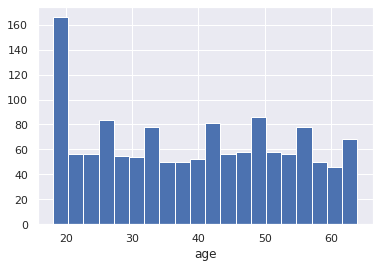

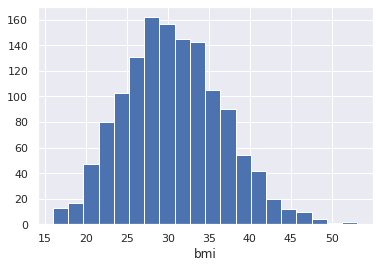

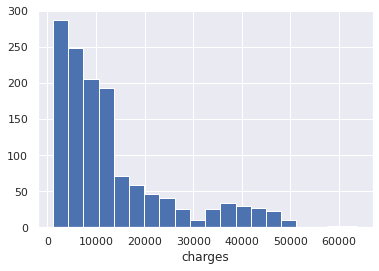

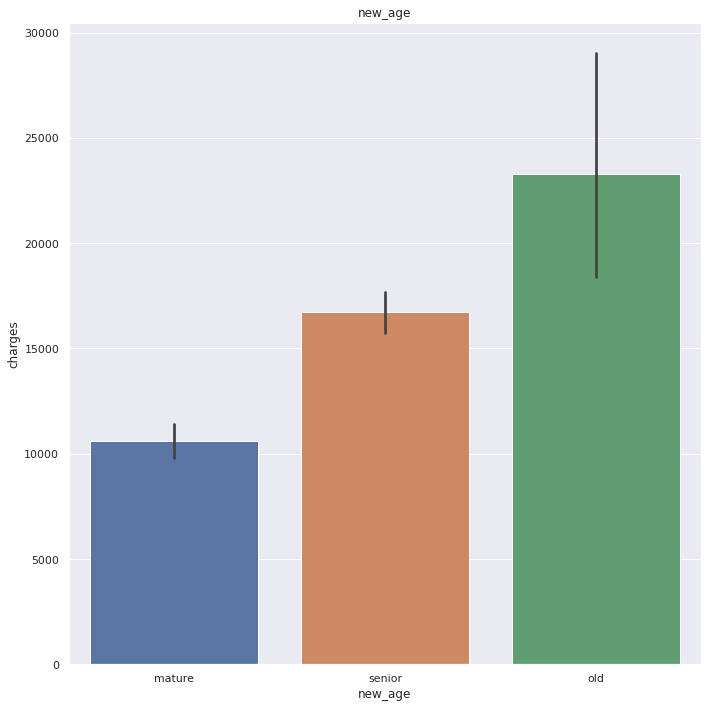

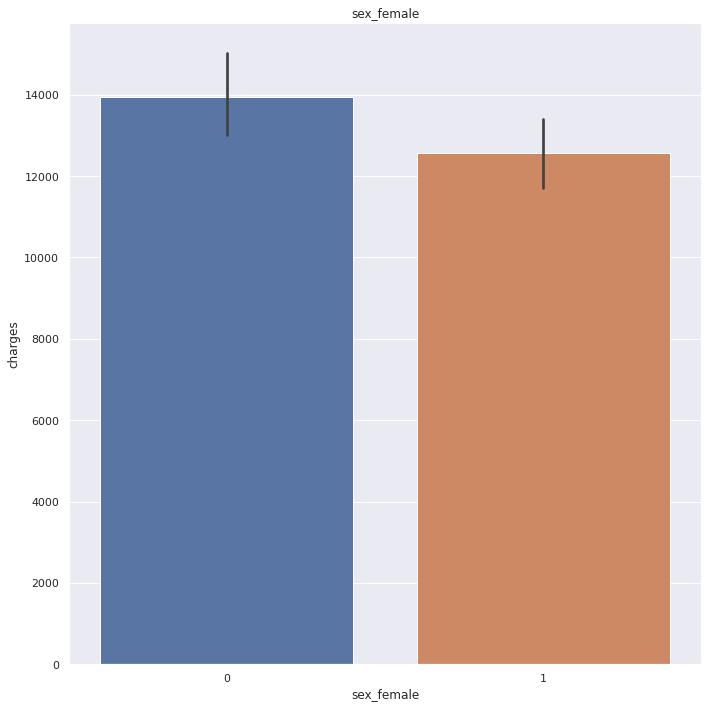

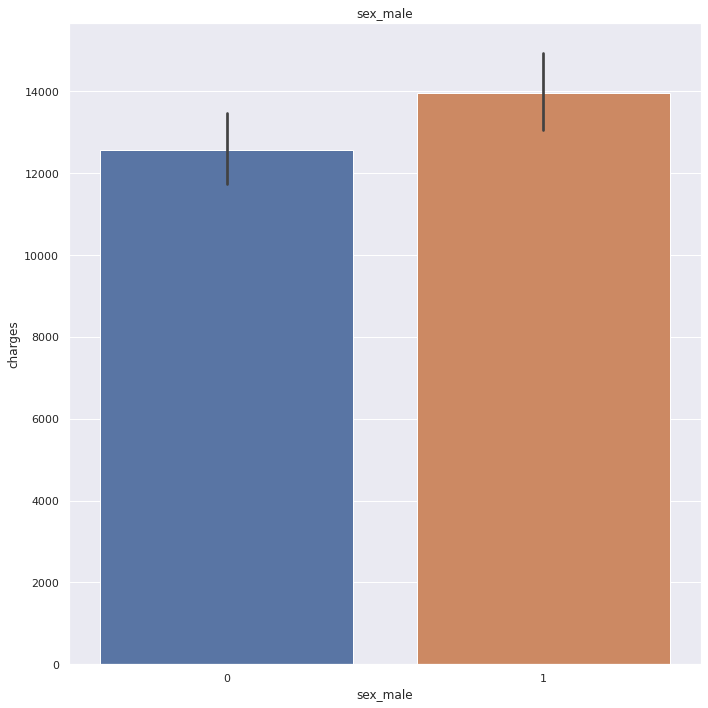

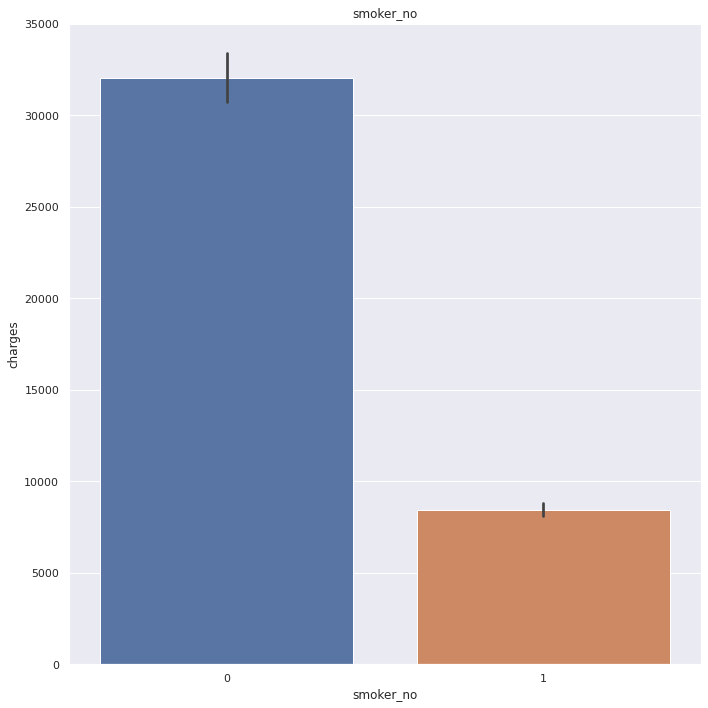

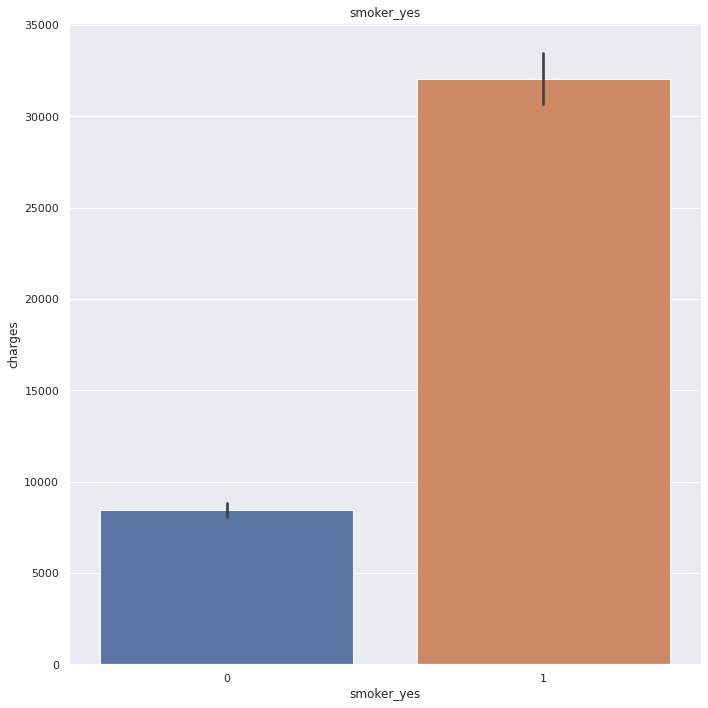

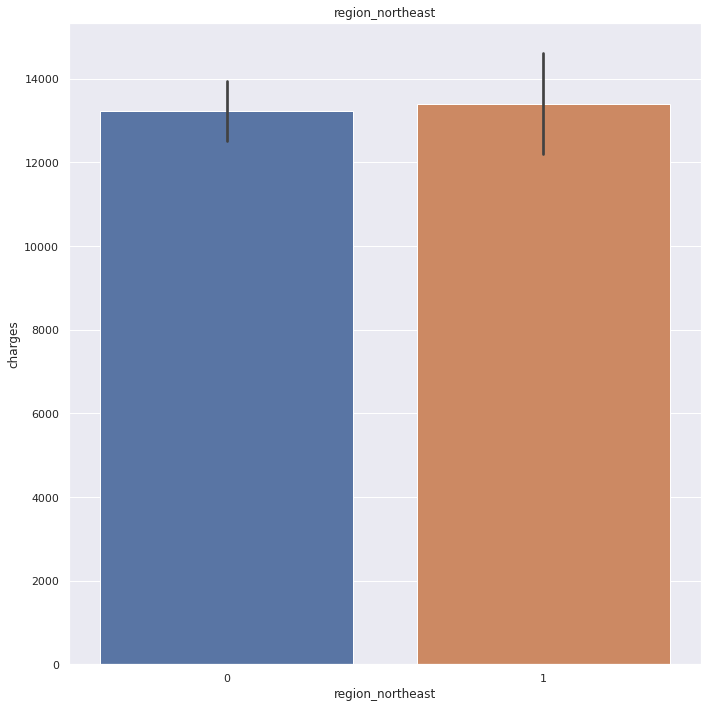

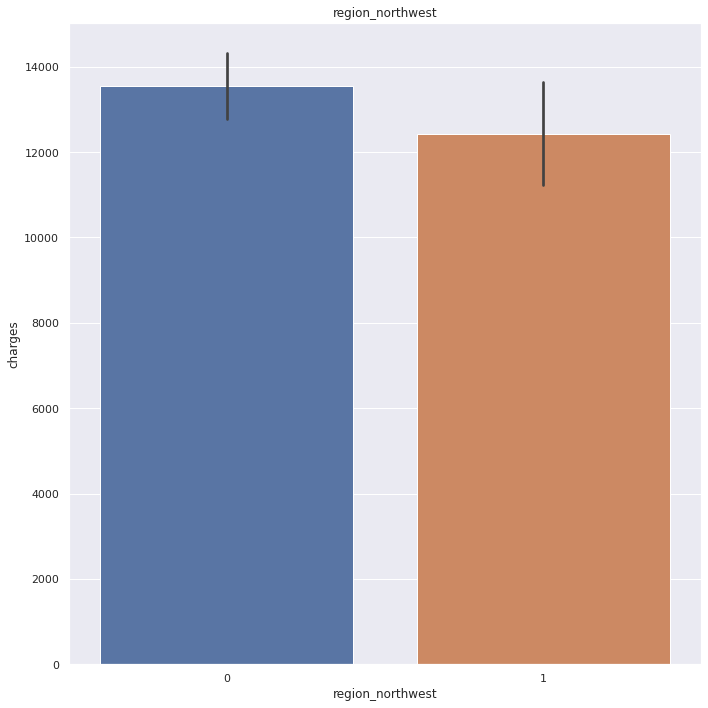

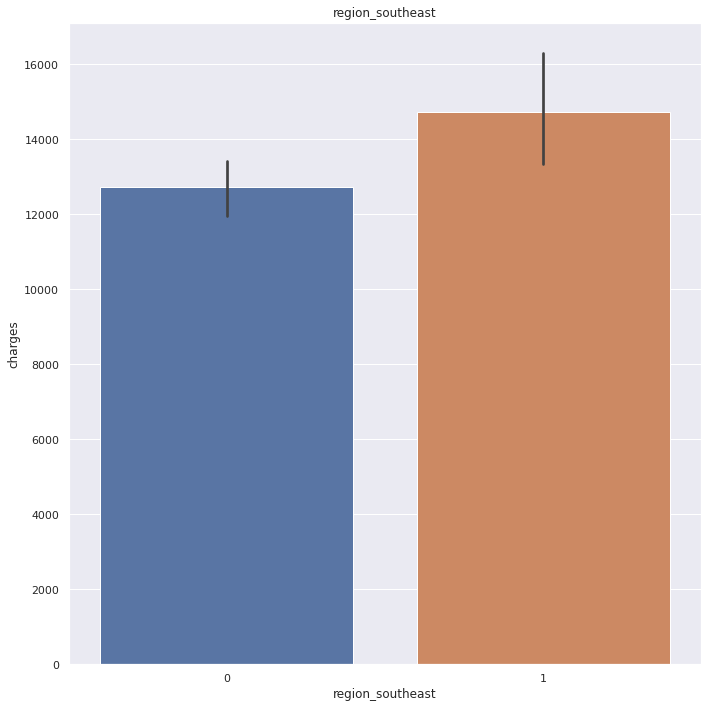

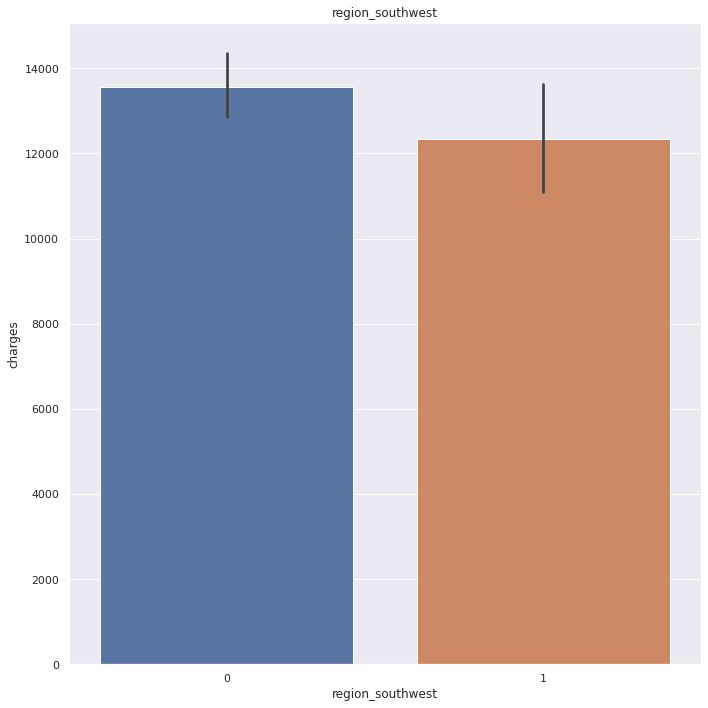

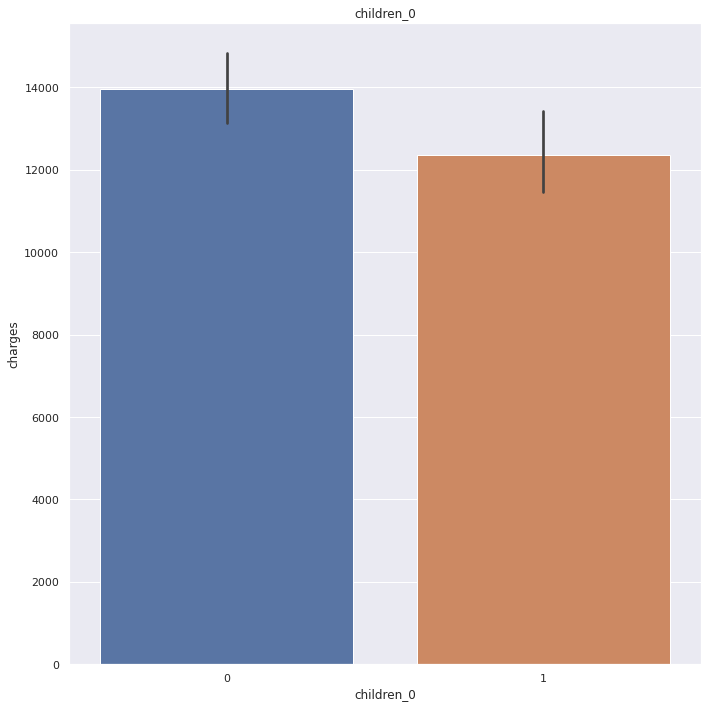

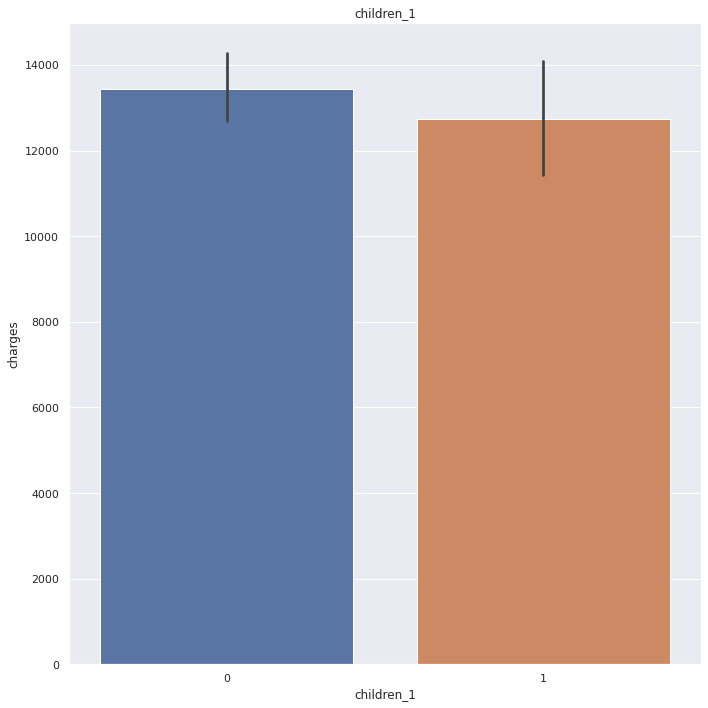

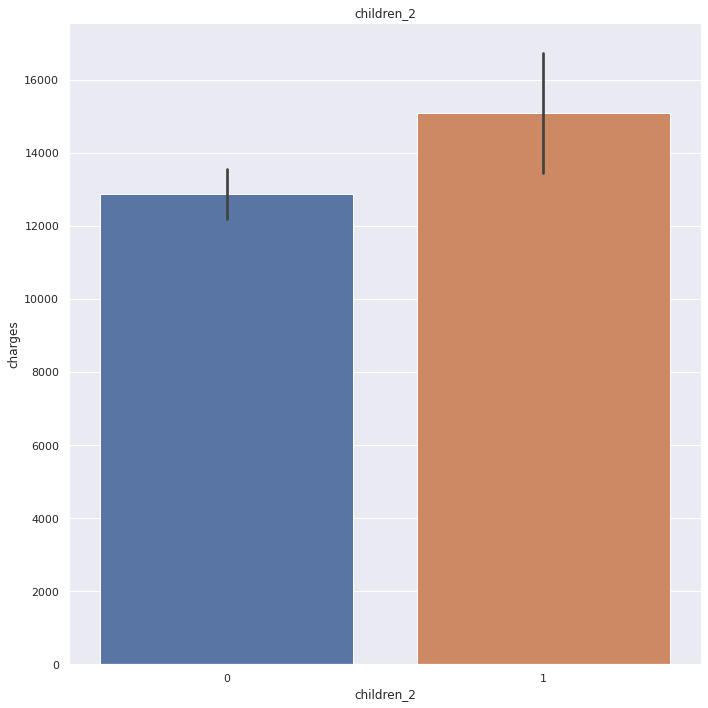

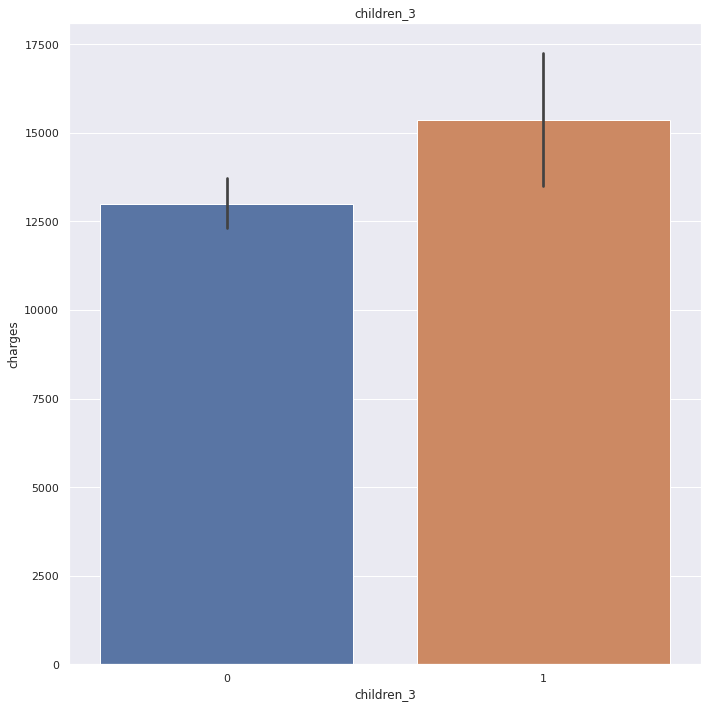

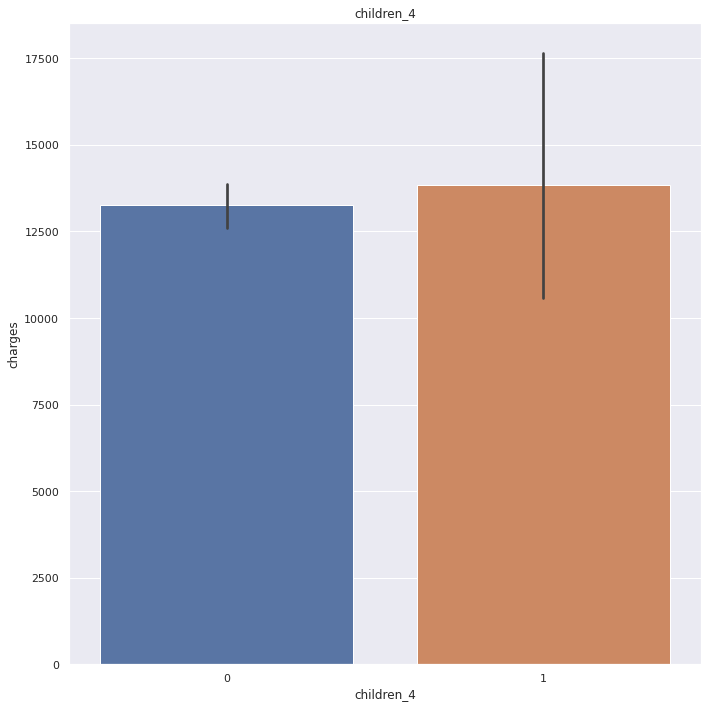

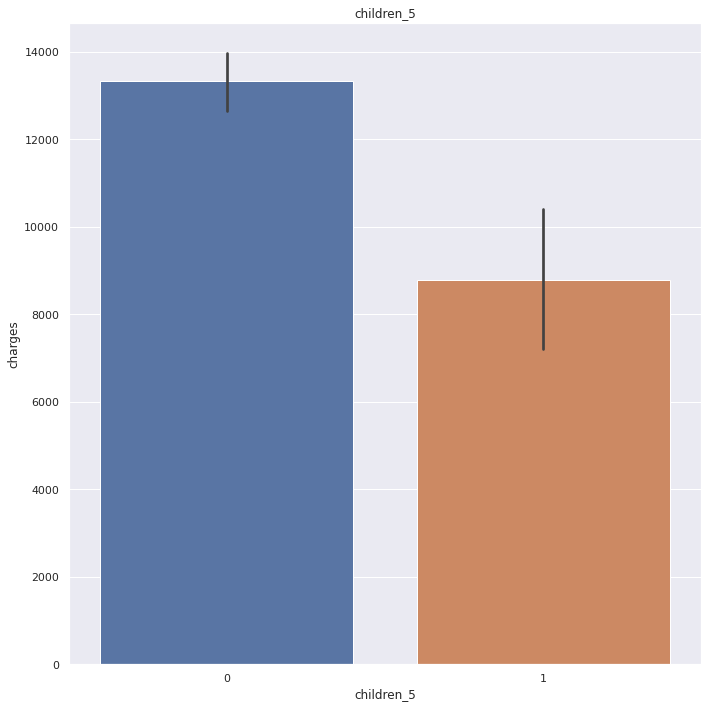

ValueError: ignored

<Figure size 720x720 with 0 Axes>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sklearn
import pickle
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 170)

def load_dataset(filename, extension='.csv'):
    """
    Iports the dataset
    Parameters
    ----------
    dataset

    Returns
    -------
    dataframe
    """
    if 'csv' in extension:
        data = pd.read_csv(filename+extension)
    elif 'xls' in extension:
        data = pd.read_excel(filename+extension)
    elif 'pkl' in extension:
        data = pd.DataFrame(pickle.load(open(filename+extension, 'rb')))
    return data
# df = load_dataset("insurance")

######################################################
# Exploratory Data Analysis
######################################################

# Tablonun özet istatistikleri:
def check_df(dataframe, head=5):
    """
    Prints out the shape, types, head, missing values and quantiles of the dataframe
    Parameters
    ----------
    dataframe
    head

    Returns
    -------
    No return
    """
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("################ Missing Values ################")
    print(dataframe.isnull().sum())
check_df(df, 5)
df.describe()

# Kategorik ve sayısal değişkenlerin belirlenmesi
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Determines the categorical, numerical and categorical but cardinal columns.

    Parameters
    ------
        dataframe: dataframe
                dataframe whihc inludes the columns
        cat_th: int, optional
                class threshold valuse for determining numeric but categorical variable
        car_th: int, optional
                class threshold valuse for determining categoric but cardinal variable

    Returns
    ------
        cat_cols: list
                categorical columns
        num_cols: list
                numerical columns
        cat_but_car: list
                categoric but cardinal columns

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total columns
        cat_cols = all_cat_cols + num_but_cat - cat_but_car
        num_cols = all_num_cols - num_but_cat
    """

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")

    # cat cols
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    print(f'init cat_cols: {len(cat_cols)}')

    # num cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    print(f'init num_cols: {len(num_cols)}')

    # num but cat cols
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    print(f'num_but_cat: {len(num_but_cat)}')

    # cat but car cols
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    print(f'cat_but_car: {len(cat_but_car)}')

    # cat cols
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    print(f'final cat_cols: {len(cat_cols)}')

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    print(f'final num_cols: {len(num_cols)}')

    return cat_cols, num_cols, cat_but_car
cat_cols, num_cols, cat_but_car = grab_col_names(df)

######################################################
# Feature Engineering
######################################################
def new_feature_interval(dataframe, col, interval_value, header="new"):
    if header == "new":
        new_col = "new_" + col
    else:
        new_col = header
    for intrvl, val in interval_value.items():
        dataframe.loc[[var in intrvl for var in dataframe[col]], new_col] = val
new_feature_interval(df, 'age',
                   {
                    pd.Interval(-np.inf, 18, closed='neither'):'young',
                    pd.Interval(18, 44, closed='left'):'mature',
                    pd.Interval(44, 64, closed='left'):'senior',
                    pd.Interval(64, np.inf, closed='left'):'old'
                   }
                   )

# Tablonun özet istatistikleri:
check_df(df)      

##########################
# Görsel Analiz
##########################
def plot_numerical_col(dataframe, numerical_col):
    dataframe[numerical_col].hist(bins=20)
    plt.xlabel(numerical_col)
    plt.show()
for col in num_cols:
    plot_numerical_col(df, col)

def plot_bar(df, x, y, title, save=None):
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x=x, y=y, data=df)
    plt.title(title)
    plt.tight_layout()
    plt.show()
    if save != None:
        plt.savefig(save)

for col in cat_cols:
    plot_bar(df, col, 'charges', col)

plot_bar(df, 'smoker', 'bmi', col)
plot_bar(df, 'region', 'bmi', col)
sns.boxplot(x='new_age',y='bmi',data=df)


##########################
# Target Analizi
##########################

# Tüm kategorik değişkenlerin özet istatistikleri:
def cat_cols_summary(dataframe, cat_cols, plot=False):
    """
    Ratio of the categorical classes in a column
    Parameters
    ----------
    dataframe
    col_name
    plot

    Returns
    -------
    No return
    """
    print("############## Frequency and Ratio #############")
    print(pd.DataFrame({"Freq": dataframe[cat_cols].value_counts(),
                        "Ratio": 100 * dataframe[cat_cols].value_counts() / len(dataframe)}).rename_axis(cat_cols))

    if plot:
        for col in cat_cols:
            sns.countplot(x=dataframe[col], data=dataframe)
            plt.show()
cat_cols_summary(df, 'charges')

##########################
# Feature Analizi
##########################

# Tüm sayısal değişkenlerin özet istatistikleri:
def num_cols_summary(dataframe, num_cols, plot=False):
    """
    Numerical variable exploration
    Parameters
    ----------
    dataframe
    numerical_col
    plot

    Returns
    -------
    No return
    """
    print("################### Describe ###################")
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40,
                 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[num_cols].describe(quantiles).T)

    if plot:
        for col in num_cols:
            dataframe[col].hist(bins=20)
            plt.xlabel(col)
            plt.title(col)
            plt.show()
num_cols_summary(df, num_cols, False)

##########################
# Target vs Features Analizi
##########################

def target_vs_num_cols_summary(dataframe, target, num_col):
    """
    Prints out the defined numeric variable mean of the target classes
    Parameters
    ----------
    dataframe
    target
    num_col

    Returns
    -------
    No return
    """
    print(pd.DataFrame(
        {num_col+"_MEAN": dataframe.groupby(target).agg({num_col: "mean"})[num_col]}), end="\n\n\n")
for col in num_cols:
    target_vs_num_cols_summary(df, "charges", col)

######################################################
# Data Preprocessing (Veri Ön İşleme)
######################################################

# Eksik değer incelemesi:
df.isnull().sum()

# Aykırı değer incelemesi:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    """
    Appoints the lower and upper thresholds by use of quantile
    Parameters
    ----------
    dataframe
    col_name
    q1: first quantile percentage
    q3: third quantile percentage

    Returns
    -------
    low_limit and up_limit thresholds as tupple
    """
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit
def check_outlier(dataframe, col_name, q1=0.05, q3=0.95):
    """
    Checks if there is an outlier and return bool value
    Parameters
    ----------
    dataframe
    col_name

    Returns
    -------
    outlier existance as bool
    """
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
for col in num_cols:
    print(col, check_outlier(df, col))


#############################################
# One-Hot Encoding
#############################################
def one_hot_encoder(dataframe, cat_cols, drop_first=False, dummy_na=False):
    """
    Encodes the column of the dataframe with binary labels
    Parameters
    ----------
    dataframe
    categorical_cols
    drop_first

    Returns
    -------
    The one-hot encoded columns added dataframe
    """
    dataframe = pd.get_dummies(
        dataframe, columns=cat_cols, drop_first=drop_first, dummy_na=dummy_na)
    return dataframe
df = one_hot_encoder(df, cat_cols)

# Tablonun özet istatistikleri:
check_df(df)



#############################################
# Feature Scaling (Özellik Ölçeklendirme)
#############################################
def robust_scaling(dataframe, col_name):
    """
    Scale features using statistics that are robust to outliers.
    This Scaler removes the median and scales the data according to the quantile range (defaults to IQR)
    Parameters
    ----------
    dataframe
    col_name

    Returns
    -------
    Robust scaled dataframe
    """
    rs = RobustScaler()
    dataframe[col_name] = rs.fit_transform(dataframe[[col_name]])
    return dataframe
for col in num_cols:
    df[col] = robust_scaling(df, col)

df.head()

def save_dataset(data, filename, extension='.csv'):
    """
    Iports the dataset
    Parameters
    ----------
    dataset

    Returns
    -------
    dataframe
    """
    if 'csv' in extension:
        data.to_csv(filename+extension)
    elif 'xls' in extension:
        data.to_excel(filename+extension, index=False)
    elif 'pkl' in extension:
        pickle.dump(data, open(filename+extension, 'wb'))
# save_dataset(df, 'insurance_data_prep', '.pkl')

---

## İrem

In [ ]:
# Count of duplicate rows 
# Yinelenen bu satır silinmeli yoksa 1 tane olduğu için dikkate alınmamalı mı ?
df.duplicated().sum()

In [ ]:
#informations about smoker column
df["smoker"].unique()
df["smoker"].value_counts()


In [ ]:
# information about region column
df["region"].unique()
df["region"].value_counts()

In [ ]:
# The information about charges column
df[['charges']].boxplot()

In [ ]:
# The relation between "smoker" and "charges" 
sns.boxplot(x='smoker',y='charges',data=df)

In [ ]:

le = LabelEncoder()
df["region"] = le.fit_transform(df["region"])
df["smoker"] = le.fit_transform(df["smoker"])
df.head()

In [ ]:
# The relation between "smoker" and "region" 
sns.boxplot(x='smoker',y='region',data=df)

---

## Mert

### Q.3. region with most children

In [ ]:
# region with most children

# input: pandas dataframe
# return: region with most children

def region_most_children(df: 'pd.DataFrame', output:'str'='')-> 'str':
    # dictionary keys: region names, values: None
    reg_child_dict = dict.fromkeys(df.region.unique())

    # below for loop assigns values to reg_child_dict dictionary
    for key in reg_child_dict:
        reg_child_dict[key] = df[df["region"] == key].children.sum()
    return max(reg_child_dict, key=reg_child_dict.get)
region_most_children(df)

NameError: ignored

### Q.3. relation between "children" and "bmi"

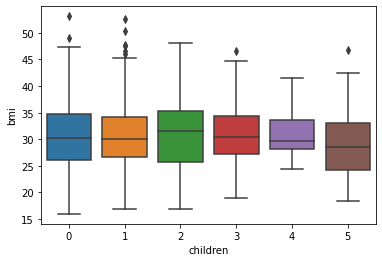

In [ ]:
#   below boxplot shows the relation between "children" and "bmi" 
sns.boxplot(x='children',y='bmi',data=df)

Merve 



bmi
Bmi(Vücut Kitle İndeksi)’nin dağılımını inceleyiniz
“bmi” değişkeninde outlier var mıdır? İnceleyiniz.




In [ ]:
#Merve

##Analysing the data stats

unique_val = df['sex'].value_counts()
print(unique_val)

df.describe()

#The factors that might affect the health insurance cost are:-

#Age: Age of the beneficiary
#Sex: Gender of the beneficiary
#BMI: Body Mass Index (kg / m^2)
#Children: Number of children / Number of dependants
#Smoker: Does smoke or not
#Region: Residential area of the beneficiary '''

# null data check

df.isnull().values.any()

# The datatype of the all the categories are correct, hence no changes needed. Also, there are no null valued elements

# This shows a brief description of the "bmi" column.

df['bmi'].describe()

'''Few observations:-

The minimum of an bmi is 15.96
Around 75% of the bmi are below 35.00
The maximum of an bmi is 53.13 
'''

# Histrogram of Body Mass Index (kg / m^2)

plt.figure(figsize=(8,5))
df.bmi.hist(bins=120)
plt.title('Body Mass Index', fontsize=20)
plt.show()


"""Günümüzde BMI, en sık kullanılan sağlık ölçülerinden birisidir. 
Hemşireler sizin boyunuzu ve kilonuzu ölçtüğünde, kolaylıkla BMI değerinizi görürler. 
Özellikle ABD gibi ülkelerde sigorta şirketleri, müşterilerinden her yıl ne kadar para talep edeceklerini belirlerken bunu ölçüt olarak kullanırlar.

18.5'un altındaysanız aşırı zayıfsınız, (Underweight)
18.5-24.9 arasıysanız normalsiniz, (normal weight)
25-29.9 arasındaysanız kilolusunuz, ( overweight)
30'dan fazlaysanız obezsiniz demektir. (obese) 

"""

import matplotlib.pyplot as plt
from scipy import stats


_, bins, _ = plt.hist(df.bmi, bins = 10,
                      density = 1, alpha = 0.5,
                      ec= 'black' )
mu, sigma = stats.norm.fit(df.bmi)
best_fit_line = stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line, 'g-o')
plt.xlabel("Body Mass Index (BMI)")
plt.show()

"""Yukarıdaki histogramda görüldüğü üzere bins = 10 için 10 ayrı parçaya bölerek frekans yoğunluğunu göstermiştir. 
Ayrıca çağ eğrisi çizdirerek histogramın dağılımını gözlemlemek daha kolay bir hale gelmiştir.

Bmi (vücut kitle indeksi) normal dağılım göstermiştir. 

Ortalama vücut kitle indeksi 30.7'de yığılmıştır bu da datada yer alan kişilerin obeziteye yakın olduğunu gösterir."""

# Boxplot of Body Mass Index:
plt.figure(figsize=(8,5))
sns.boxplot(df['bmi'])
plt.title('Body Mass Index (Boxplot)', fontsize=20)
plt.show()

""" 
45'ten sonraki çizgide noktalar bulunmaktadır, 
bunlar diğer gözlem kutusuna dahil edilmediğinden yani çeyreklerin yakınında hiçbir yerde bulunmadığından aykırı değerlerdir. 

Grafiğe bakıldığında bireylerin çoğunun vücut kitle endeksinin 25 ile 35 arasında olduğunu 
fakat sağdaki gözlemlerin popülasyondan uzakta olan aykırı değerler oldğu görülmektedir.

"""




NameError: ignored

# Turhan

In [ ]:
data = df.copy()
print('Veri Setinin Satır Sayısı {0}, Sütün Sayısı {1}'.format(data.shape[0],data.shape[1]))
print('Veri Setinin Betimsel istatistik Sonuçları:\n------------------------------------------------\n', data.describe().T)
print('Öznitelikler Hakkında Özet Bilgiler:\n------------------------------------------------')
print(data.info())
print('Özniteliklerin Kayıp Değer Sayıları:\n-------------------')
print(data.isnull().sum())

Harika, hiç eksik değerimiz yok. Şimdi bazı grafiklerle EDA yapalım :)

## Ücret Dağılımı

In [ ]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(data['charges'], kde = True, color = 'c')
ax.set_xlabel('Ücret [$]')
ax.set_ylabel('Yoğunluk')
plt.title('Sigorta Ücreti Dağılımı')
plt.show()

## Korelasyon Matrisi

In [ ]:
f, ax = pl.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax,annot = True, fmt='.2f')
plt.show()

## BMI vs Cinsiyet
Cinsiyet kategorik bir veri olduğu için korelasyon matrisinde göremedik. Bu sebeple cinsiyete bir operasyon uygulamamız gereklidir. 

LabelEncoder uygulayarak cinsiyeti sayısal hale getirebiliriz.*italik metin*

In [ ]:
le = LabelEncoder() 
le.fit(data.sex.drop_duplicates()) # sadece female ve male olarak fit ediyorum
data.sex = le.transform(data.sex) # veri setine uyguluyoruz
data.sex 

Artık Kadın -> 0 ve Erkek -> 1 olarak ifade ediliyor

In [ ]:
data.sex.value_counts() # Kaç kadın, kaç erkek var bakalım

In [ ]:
f, ax = pl.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax,annot = True, fmt='.2f')
plt.show()

Görüldüğü gibi şimdi korelasyon matrisinde cinsiyet değerini görebiliyoruz. 
* Cinsiyet ve BMI arasında 0.05'lik az bir pozitif korelasyon var.
* Şimdi bu değişkenleri kendi aralarında görselleştirelim

In [ ]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='bmi',data=data,palette='Wistia',ax=ax)
ax.set_title('Cinsiyet ve BMI için Keman Grafik')

ax = f.add_subplot(122)
sns.boxplot(x='sex', y='bmi',data=data,palette='magma',ax=ax)
ax.set_title('Cinsiyet ve BMI için Kutu Grafik');

In [ ]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(311)
ax = sns.barplot(x='region', y='bmi', hue='sex',data=data, palette='cool')

ax = f.add_subplot(312)
ax = sns.barplot(x='smoker', y='bmi', hue='sex',data=data, palette='Set2')

ax = f.add_subplot(313)
ax = sns.barplot(x='children', y='bmi', hue='sex',data=data, palette='Set1')

In [ ]:
ax = sns.lmplot(x = 'bmi', y = 'charges', data=data, hue='sex', palette='Set1')
ax = sns.lmplot(x = 'children', y = 'bmi', data=data, hue='sex', palette='Set2')

## BMI vs Maliyet
Bu iki değişken de nümerik olduğu için herhangi bir oerasyon uygulamaya gerek yok. 

Yurakıdaki korelasyon matrisine bakılırsa Maliyet ve BMI arasında 0.20'lik nisbeten yüksek bir pozitif korelasyon var.
* Şimdi bu değişkenleri kendi aralarında görselleştirelim

In [ ]:
sns.lmplot(x='bmi',y='charges',data=data,aspect=2,height=6)
plt.xlabel('Vucut Kütle Endeksi $(kg/m^2)$: Bağımsız Değişken')
plt.ylabel('Sigorta Maliyeti: Bağımlı Değişken')
plt.title('Charge Vs BMI')

In [ ]:
f = plt.figure(figsize=(18,36))
ax = f.add_subplot(511)
sns.scatterplot(x='bmi',y='charges',data=data,palette='magma',hue='smoker')
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(512)
sns.scatterplot(x='bmi',y='charges',data=data,palette='Set1',hue='sex')
ax.set_title('Scatter plot of Charges vs bmi')

ax = f.add_subplot(513)
sns.scatterplot(x='bmi',y='charges',data=data,palette='viridis',hue='children')
ax.set_title('Scatter plot of Charges vs bmi')

ax = f.add_subplot(514)
sns.scatterplot(x='bmi',y='charges',data=data,palette='magma',hue='age')
ax.set_title('Scatter plot of Charges vs bmi')

ax = f.add_subplot(515)
sns.scatterplot(x='bmi',y='charges',data=data,palette='Set1',hue='region')
ax.set_title('Scatter plot of Charges vs bmi')

plt.show()

In [ ]:
# Bmi ve Sigorta Maliyeti için aykırı değerleri bulalım
plt.figure(figsize= (10,8))
plt.subplot(2,1,1)
sns.boxplot(x= data.bmi, color='lightblue')

plt.subplot(2,1,2)
sns.boxplot(x= data.charges, color='red')

plt.show()

# Q.4

In [ ]:
# ENCODING

# Create an LabelEncoder object
encoder = LabelEncoder()

# Encode the features to integers inside a for loop
for i in df.columns:
    df[i] = encoder.fit_transform(df[i])
    
df.head()

# TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'charges'], df.charges, test_size = 0.2)
    


# NORMALIZATION

# X_train
   # age 
X_train["age"] = (X_train["age"]-X_train["age"].mean()) / X_train["age"].std()
   # bmi
X_train["bmi"] = (X_train["bmi"]-X_train["bmi"].mean()) / X_train["bmi"].std()
  # children
X_train["children"] = (X_train["children"]-X_train["children"].mean()) / X_train["children"].std()

# X_test
   # age 
X_test["age"] = (X_test["age"]-X_test["age"].mean()) / X_test["age"].std()
   # bmi
X_test["bmi"] = (X_test["bmi"]-X_test["bmi"].mean()) / X_test["bmi"].std()
   # children
X_test["children"] = (X_test["children"]-X_test["children"].mean()) / X_test["children"].std()